# Практическое занятие: Проверка статистических гипотез

## Введение

В этом практическом занятии вы научитесь применять различные методы проверки статистических гипотез на реальных примерах. Мы рассмотрим:

1. Одновыборочный t-тест
2. Двухвыборочный t-тест
3. Тест хи-квадрат
4. Однофакторный дисперсионный анализ (ANOVA)

### Цели занятия:
- Научиться формулировать статистические гипотезы
- Освоить применение различных статистических тестов
- Научиться интерпретировать результаты тестов
- Получить практический опыт анализа данных

### Требования:
- Базовое понимание статистики
- Знание Python и основных библиотек для анализа данных
- Jupyter Notebook

## 1. Подготовка к работе

Сначала импортируем необходимые библиотеки и создадим тестовые наборы данных для наших упражнений.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка для отображения графиков
sns.set_theme()  # Используем настройки seaborn напрямую
plt.style.use('default')  # Используем стандартный стиль matplotlib

# Для воспроизводимости результатов
np.random.seed(42)

# Создаем тестовые наборы данных
# 1. Данные для одновыборочного t-теста
sample_1 = np.random.normal(loc=102, scale=15, size=100)  # Рост студентов

# 2. Данные для двухвыборочного t-теста
group_a = np.random.normal(loc=75, scale=10, size=50)  # Результаты теста группы A
group_b = np.random.normal(loc=80, scale=10, size=50)  # Результаты теста группы B

# 3. Данные для теста хи-квадрат
# Создадим данные о предпочтениях в еде и музыке
food_preferences = np.random.choice(['Пицца', 'Суши', 'Бургер'], size=100)
music_preferences = np.random.choice(['Рок', 'Поп', 'Джаз'], size=100)

# 4. Данные для ANOVA
group_1 = np.random.normal(loc=20, scale=5, size=30)  # Метод обучения 1
group_2 = np.random.normal(loc=22, scale=5, size=30)  # Метод обучения 2
group_3 = np.random.normal(loc=25, scale=5, size=30)  # Метод обучения 3

## 2. Одновыборочный t-тест

### Теория
Одновыборочный t-тест используется для проверки гипотезы о том, что среднее значение выборки статистически значимо отличается от известного или предполагаемого значения генеральной совокупности.

### Пример: Рост студентов
Предположим, что средний рост студентов в стране составляет 100 см. Мы хотим проверить, отличается ли средний рост в нашей выборке от этого значения.

#### Формулировка гипотез:
- H₀: μ = 100 (средний рост равен 100 см)
- H₁: μ ≠ 100 (средний рост не равен 100 см)

Описательная статистика выборки:
Средний рост: 100.44 см
Стандартное отклонение: 13.62 см


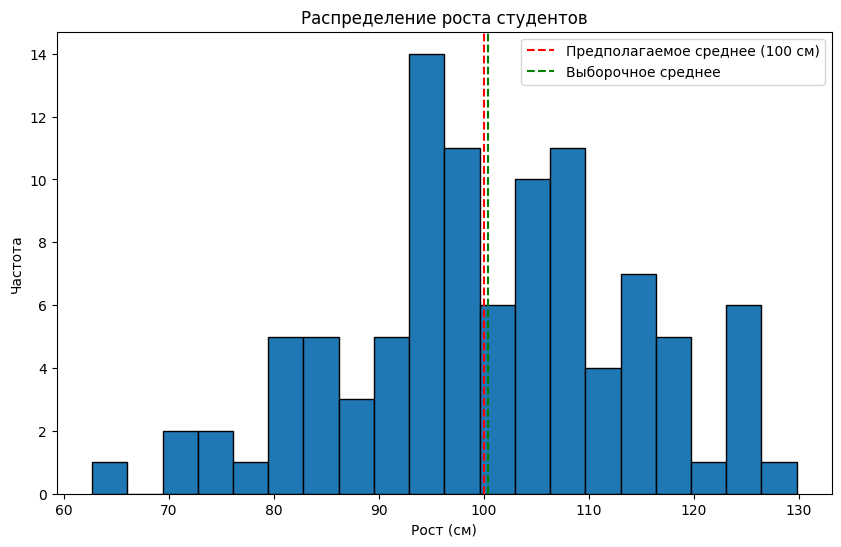


Результаты одновыборочного t-теста:
t-статистика: 0.3247
p-значение: 0.7461

Вывод:
Не отвергаем нулевую гипотезу - нет статистически значимых различий


In [ ]:
# Решение примера
print("Описательная статистика выборки:")
print(f"Средний рост: {np.mean(sample_1):.2f} см")
print(f"Стандартное отклонение: {np.std(sample_1, ddof=1):.2f} см")

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(sample_1, bins=20, edgecolor='black')
plt.axvline(100, color='red', linestyle='--', label='Предполагаемое среднее (100 см)')
plt.axvline(np.mean(sample_1), color='green', linestyle='--', label='Выборочное среднее')
plt.title('Распределение роста студентов')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Проведение t-теста
t_statistic, p_value = stats.ttest_1samp(sample_1, 100)

print("\nРезультаты одновыборочного t-теста:")
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий")

### Задание для самостоятельной работы

Вам предоставлены данные о времени выполнения теста студентами. Предполагается, что среднее время выполнения теста составляет 45 минут.

Проведите одновыборочный t-тест, чтобы проверить это предположение:

1. Создайте выборку из 80 наблюдений со средним 47 минут и стандартным отклонением 5 минут
2. Сформулируйте нулевую и альтернативную гипотезы
3. Визуализируйте данные
4. Проведите t-тест
5. Сделайте выводы

Используйте приведенный выше пример как образец для выполнения задания.

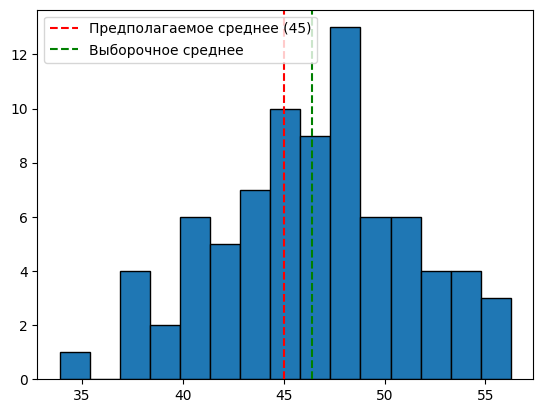

Среднее выборки: 46.38
t-статистика: 2.5797
p-значение: 0.0117
Отвергаем H0: среднее выборки статистически отличается от 45 минут.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Для воспроизводимости
np.random.seed(42)

# 1. Создаём выборку
sample = np.random.normal(loc=47, scale=5, size=80)

# 2. Формулировка гипотез:
# H0: μ = 45
# H1: μ ≠ 45

# 3. Визуализация
plt.hist(sample, bins=15, edgecolor='black')
plt.axvline(45, color='red', linestyle='--', label='Предполагаемое среднее (45)')
plt.axvline(sample.mean(), color='green', linestyle='--', label='Выборочное среднее')
plt.legend()
plt.show()

# 4. Одновыборочный t-тест
t_stat, p = stats.ttest_1samp(sample, 45)

print(f"Среднее выборки: {sample.mean():.2f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p:.4f}")

# 5. Вывод
if p < 0.05:
    print("Отвергаем H0: среднее выборки статистически отличается от 45 минут.")
else:
    print("Не отвергаем H0: данных недостаточно, чтобы отличать среднее от 45 минут.")


## 3. Двухвыборочный t-тест

### Теория
Двухвыборочный t-тест используется для сравнения средних значений двух независимых выборок. Он помогает определить, есть ли статистически значимая разница между средними значениями двух групп.

### Пример: Сравнение результатов тестирования
Сравним результаты тестирования двух групп студентов, обучающихся по разным методикам.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ (средние баллы групп равны)
- H₁: μ₁ ≠ μ₂ (средние баллы групп различаются)

Описательная статистика:

Группа A:
Среднее: 74.61
Стандартное отклонение: 10.15

Группа B:
Среднее: 80.84
Стандартное отклонение: 8.94


/tmp/ipython-input-2182935639.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b], labels=['Группа A', 'Группа B'])


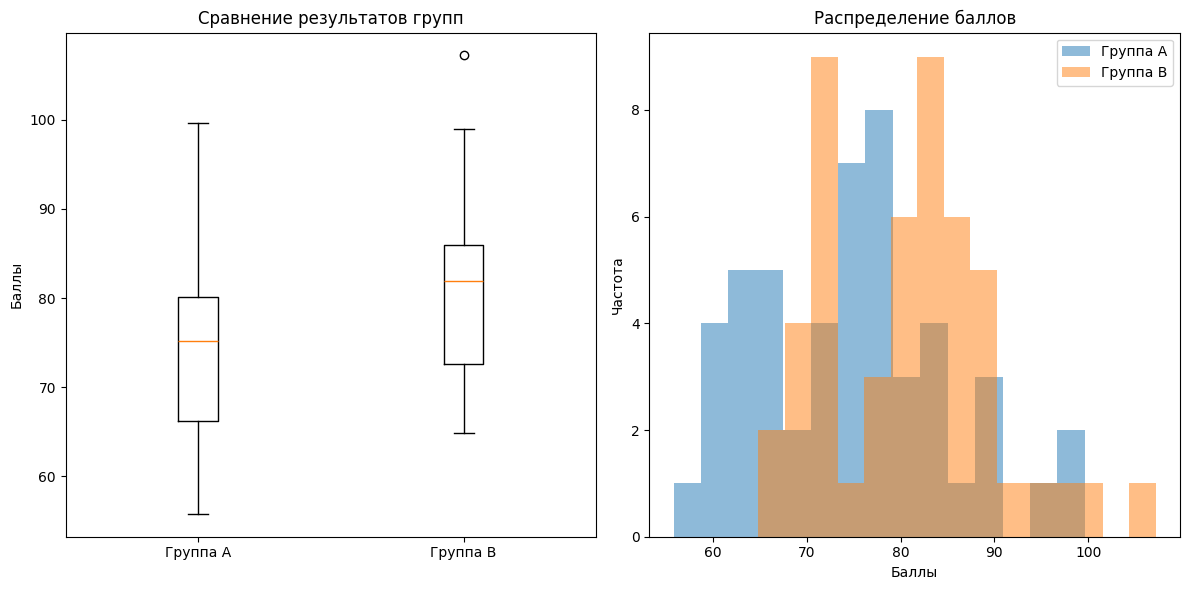


Результаты двухвыборочного t-теста:
t-статистика: -3.2576
p-значение: 0.0015

Вывод:
Отвергаем нулевую гипотезу - есть статистически значимые различия между группами


In [ ]:
# Анализ данных групп
print("Описательная статистика:")
print("\nГруппа A:")
print(f"Среднее: {np.mean(group_a):.2f}")
print(f"Стандартное отклонение: {np.std(group_a, ddof=1):.2f}")
print("\nГруппа B:")
print(f"Среднее: {np.mean(group_b):.2f}")
print(f"Стандартное отклонение: {np.std(group_b, ddof=1):.2f}")

# Визуализация
plt.figure(figsize=(12, 6))

# Диаграмма размаха (boxplot)
plt.subplot(1, 2, 1)
plt.boxplot([group_a, group_b], labels=['Группа A', 'Группа B'])
plt.title('Сравнение результатов групп')
plt.ylabel('Баллы')

# Гистограммы
plt.subplot(1, 2, 2)
plt.hist(group_a, alpha=0.5, label='Группа A', bins=15)
plt.hist(group_b, alpha=0.5, label='Группа B', bins=15)
plt.title('Распределение баллов')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

print("\nРезультаты двухвыборочного t-теста:")
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")
print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия между группами")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий между группами")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности двух методов тренировки:

1. Создайте две выборки:
   - Группа 1: 40 спортсменов, тренирующихся по методу A (среднее время = 15 минут, станд. откл. = 3)
   - Группа 2: 40 спортсменов, тренирующихся по методу B (среднее время = 17 минут, станд. откл. = 3)

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите двухвыборочный t-тест
   - Сделайте выводы об эффективности методов тренировки

Используйте приведенный выше пример как образец для выполнения задания.

/tmp/ipython-input-867858707.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2], labels=['Метод A', 'Метод B'])


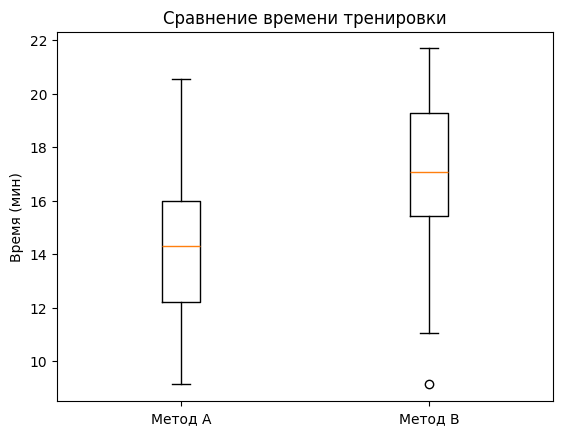

Среднее A: 14.34
Среднее B: 16.91
t-статистика: -3.9938
p-значение: 0.0001
Методы дают статистически разные результаты.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Создаём две выборки
group1 = np.random.normal(loc=15, scale=3, size=40)  # Метод A
group2 = np.random.normal(loc=17, scale=3, size=40)  # Метод B

# 2. Визуализация
plt.boxplot([group1, group2], labels=['Метод A', 'Метод B'])
plt.title('Сравнение времени тренировки')
plt.ylabel('Время (мин)')
plt.show()

# 3. Двухвыборочный t-тест
t, p = stats.ttest_ind(group1, group2)

print(f"Среднее A: {group1.mean():.2f}")
print(f"Среднее B: {group2.mean():.2f}")
print(f"t-статистика: {t:.4f}")
print(f"p-значение: {p:.4f}")

# 4. Вывод
if p < 0.05:
    print("Методы дают статистически разные результаты.")
else:
    print("Статистически значимой разницы между методами нет.")


## 4. Тест хи-квадрат

### Теория
Тест хи-квадрат используется для анализа связи между категориальными переменными. Он помогает определить, существует ли статистически значимая зависимость между двумя номинальными переменными.

### Пример: Анализ предпочтений
Исследуем связь между предпочтениями в еде и музыке.

#### Формулировка гипотез:
- H₀: Нет связи между предпочтениями в еде и музыке
- H₁: Существует связь между предпочтениями в еде и музыке

Таблица сопряженности:
Музыка  Джаз  Поп  Рок
Еда                   
Бургер     7   13   10
Пицца      9    8   16
Суши      10   12   15


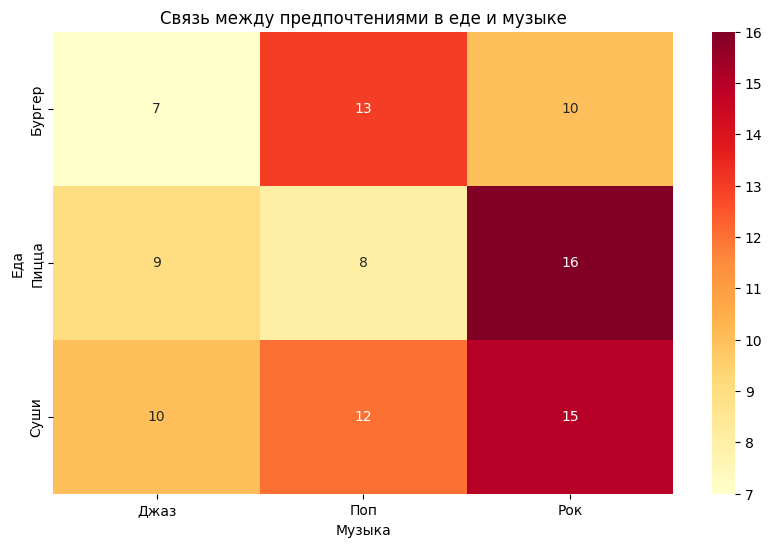


Результаты теста хи-квадрат:
Статистика хи-квадрат: 2.7418
p-значение: 0.6019
Степени свободы: 4

Вывод:
Не отвергаем нулевую гипотезу - нет статистически значимой связи между переменными


In [ ]:
# Создание таблицы сопряженности
contingency_table = pd.crosstab(pd.Series(food_preferences, name='Еда'),
                               pd.Series(music_preferences, name='Музыка'))

print("Таблица сопряженности:")
print(contingency_table)

# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Связь между предпочтениями в еде и музыке')
plt.show()

# Проведение теста хи-квадрат
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nРезультаты теста хи-квадрат:")
print(f"Статистика хи-квадрат: {chi2:.4f}")
print(f"p-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")

print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимая связь между переменными")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимой связи между переменными")

### Задание для самостоятельной работы

Проведите анализ связи между полом студентов и их выбором специальности:

1. Создайте данные:
   - 100 студентов
   - Пол: 'М' или 'Ж'
   - Специальность: 'Информатика', 'Биология', 'Физика'

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте таблицу сопряженности
   - Визуализируйте данные с помощью тепловой карты
   - Проведите тест хи-квадрат
   - Интерпретируйте результаты

Используйте приведенный выше пример как образец для выполнения задания.

col_0  Биология  Информатика  Физика
row_0                               
Ж            12           22      22
М            14           13      17


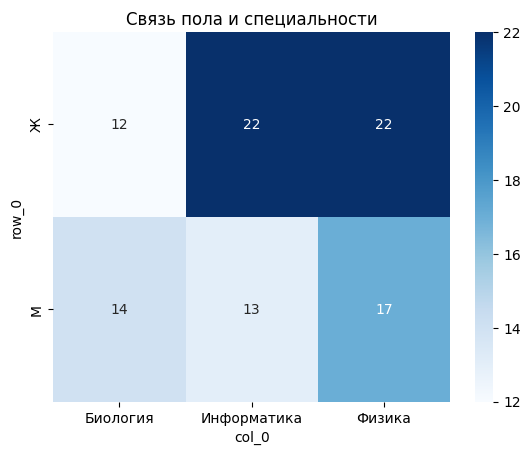

χ² = 1.6935, p = 0.4288, dof = 2
Связи не обнаружено.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

# 1. Создаём данные
gender = np.random.choice(['М', 'Ж'], size=100)
major = np.random.choice(['Информатика', 'Биология', 'Физика'], size=100)

# 2. Таблица сопряжённости
table = pd.crosstab(gender, major)
print(table)

# 3. Визуализация
sns.heatmap(table, annot=True, fmt='d', cmap='Blues')
plt.title('Связь пола и специальности')
plt.show()

# 4. Тест хи-квадрат
chi2, p, dof, exp = stats.chi2_contingency(table)

print(f"χ² = {chi2:.4f}, p = {p:.4f}, dof = {dof}")

# 5. Вывод
print("Есть связь." if p < 0.05 else "Связи не обнаружено.")


## 5. Однофакторный дисперсионный анализ (ANOVA)

### Теория
ANOVA используется для сравнения средних значений трех и более групп. Этот метод позволяет определить, есть ли статистически значимые различия между группами.

### Пример: Сравнение методов обучения
Сравним эффективность трех различных методов обучения, измеряя результаты тестирования студентов.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ = μ₃ (средние баллы всех групп равны)
- H₁: Хотя бы одна группа имеет отличное среднее значение

Описательная статистика по группам:

Метод 1:
Среднее: 19.09
Стандартное отклонение: 6.02

Метод 2:
Среднее: 21.53
Стандартное отклонение: 5.42

Метод 3:
Среднее: 23.45
Стандартное отклонение: 5.02


/tmp/ipython-input-2430944811.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=group_names)


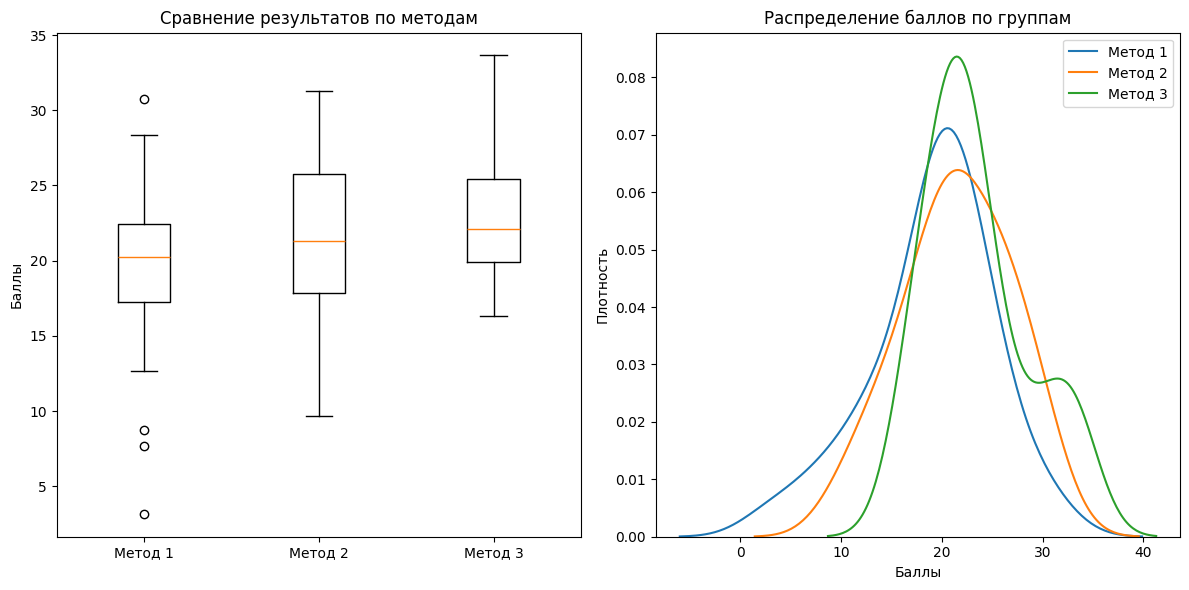


Результаты однофакторного дисперсионного анализа:
F-статистика: 4.7258
p-значение: 0.0113

Вывод:
Отвергаем нулевую гипотезу - есть статистически значимые различия между группами


In [ ]:
# Анализ данных
groups = [group_1, group_2, group_3]
group_names = ['Метод 1', 'Метод 2', 'Метод 3']

# Описательная статистика
print("Описательная статистика по группам:")
for name, group in zip(group_names, groups):
    print(f"\n{name}:")
    print(f"Среднее: {np.mean(group):.2f}")
    print(f"Стандартное отклонение: {np.std(group, ddof=1):.2f}")

# Визуализация
plt.figure(figsize=(12, 6))

# Диаграмма размаха
plt.subplot(1, 2, 1)
plt.boxplot(groups, labels=group_names)
plt.title('Сравнение результатов по методам')
plt.ylabel('Баллы')

# Распределения
plt.subplot(1, 2, 2)
for group, name in zip(groups, group_names):
    sns.kdeplot(data=group, label=name)
plt.title('Распределение баллов по группам')
plt.xlabel('Баллы')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

# Проведение ANOVA
f_statistic, p_value = stats.f_oneway(group_1, group_2, group_3)

print("\nРезультаты однофакторного дисперсионного анализа:")
print(f"F-статистика: {f_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")

print("\nВывод:")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - есть статистически значимые различия между группами")
else:
    print("Не отвергаем нулевую гипотезу - нет статистически значимых различий между группами")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности трех различных диет:

1. Создайте данные для трех групп по 25 человек:
   - Диета А: среднее снижение веса 5 кг, станд. откл. = 1.5
   - Диета B: среднее снижение веса 6 кг, станд. откл. = 1.5
   - Диета C: среднее снижение веса 4 кг, станд. откл. = 1.5

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите однофакторный дисперсионный анализ
   - Сделайте выводы об эффективности диет

Используйте приведенный выше пример как образец для выполнения задания.

## Заключение

В этом практическом занятии вы познакомились с основными методами проверки статистических гипотез:
- Одновыборочный t-тест
- Двухвыборочный t-тест
- Тест хи-квадрат
- Однофакторный дисперсионный анализ (ANOVA)

Для закрепления материала рекомендуется:
1. Выполнить все практические задания
2. Проанализировать различия между методами
3. Попрактиковаться в интерпретации результатов
4. Поэкспериментировать с различными параметрами данных

/tmp/ipython-input-3345007207.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diet_A, diet_B, diet_C], labels=['A', 'B', 'C'])


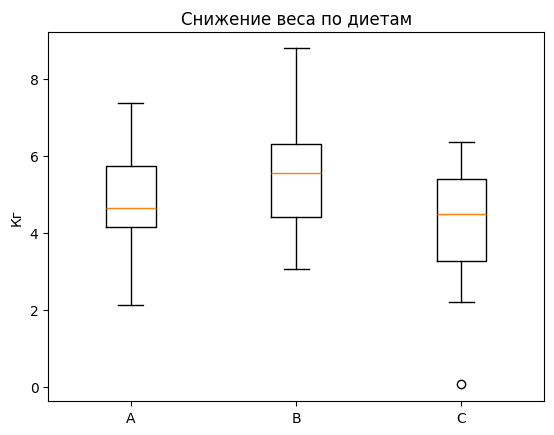

F-статистика: 6.0789
p-значение: 0.0036
Есть различия между диетами.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Создаём данные
diet_A = np.random.normal(5, 1.5, 25)
diet_B = np.random.normal(6, 1.5, 25)
diet_C = np.random.normal(4, 1.5, 25)

# 2. Визуализация
plt.boxplot([diet_A, diet_B, diet_C], labels=['A', 'B', 'C'])
plt.title('Снижение веса по диетам')
plt.ylabel('Кг')
plt.show()

# 3. ANOVA
f, p = stats.f_oneway(diet_A, diet_B, diet_C)

print(f"F-статистика: {f:.4f}")
print(f"p-значение: {p:.4f}")

# 4. Вывод
print("Есть различия между диетами." if p < 0.05 else "Различия не обнаружены.")
